In [1]:
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np


In [2]:
path_img = 'data/Section-6/s2_kunming_chenggong_6bands_20m.tif'


In [3]:
dset_img = gdal.Open(path_img)
img_array = dset_img.ReadAsArray()
img_array = img_array.transpose(1,2,0)
img_array.shape


(1611, 1497, 6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.8864].


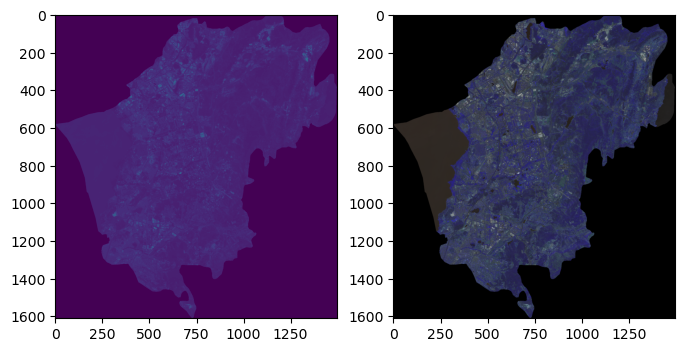

In [4]:
img_array = img_array/10000
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(img_array[:,:,0])
ax[1].imshow(img_array[:,:,1:4])


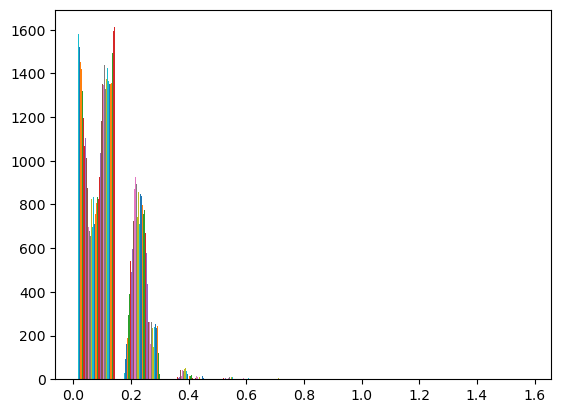

In [5]:
band_1 = img_array[:,:,0]
_ = plt.hist(band_1)


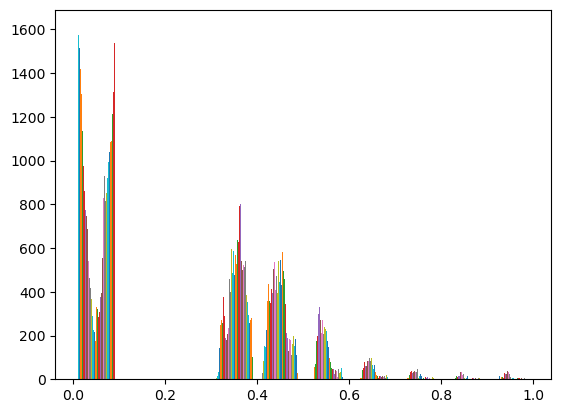

In [9]:
min_dn, max_dn = 0, 0.4
band_1_ = np.clip(band_1, min_dn, max_dn)
band_1_ = (band_1_- min_dn)/(max_dn-min_dn)
_ = plt.hist(band_1_)


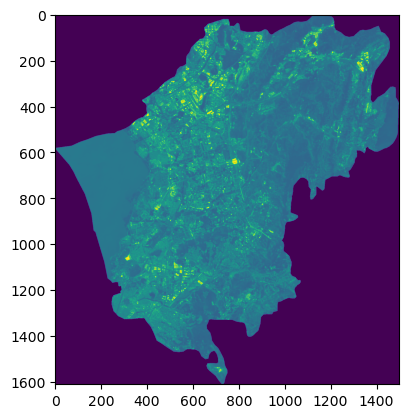

In [10]:
plt.imshow(band_1_)




In [16]:
min_dn, max_dn = np.percentile(band_1, 2), np.percentile(band_1, 98)
print(min_dn, max_dn)


0.0 0.2666


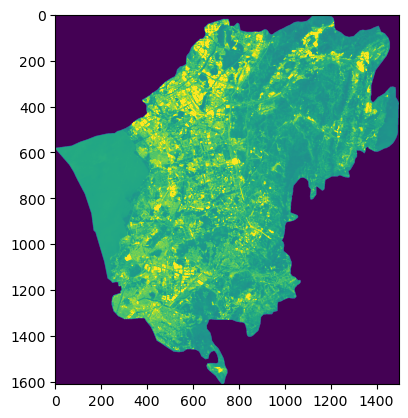

In [17]:
plt.imshow(band_1, vmax=max_dn, vmin=min_dn)

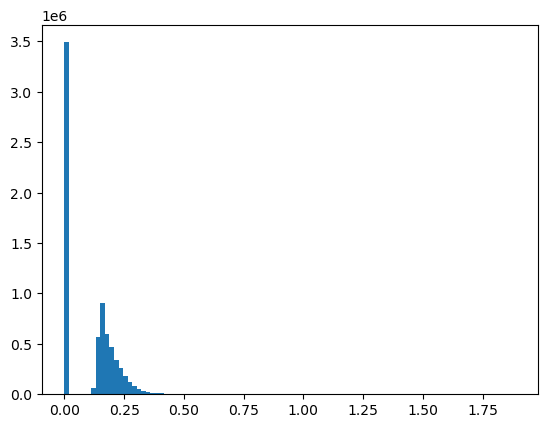

In [ ]:
band_color = img_array[:,:,0:3].copy()
band_color_ = band_color.flatten()
_ = plt.hist(band_color_, bins=100)

In [ ]:
min_dn, max_dn = np.percentile(band_color_, 5), np.percentile(band_color_, 95)
print(min_dn, max_dn)


0.0 0.2666


In [23]:
band_color_nor = np.clip(band_color, min_dn, max_dn)
band_color_nor = (band_color_nor-min_dn)/(max_dn-min_dn)


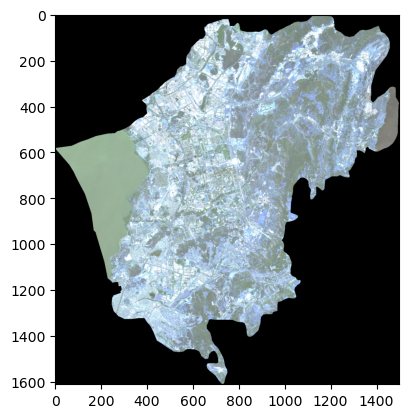

In [ ]:
plt.imshow(band_color_nor)


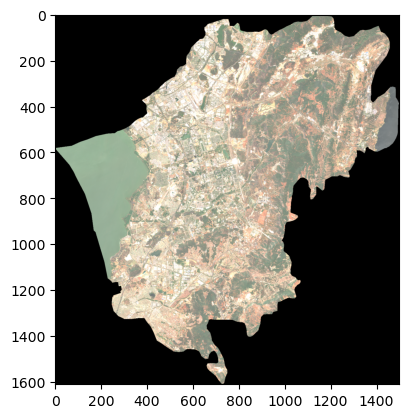

In [26]:
band_color_nor_ = np.stack([band_color_nor[:,:,2], band_color_nor[:,:,1], band_color_nor[:,:,0]], axis=2)
plt.imshow(band_color_nor_)


